# Predict with Audio U-Net 

The script bellow allows to load a trained neural network and use test data for validation.

In [1]:
import sys
import numpy as np
sys.path.insert(0, '/Users/omkarpatil/Documents/event_based_visual_microphone/bandwidth_extension/shannon_scripts')
import audio_unet as au
sys.path.insert(0, '/Users/omkarpatil/Documents/event_based_visual_microphone/utilities/')
import utility_folders as uf
import utility_spectrogram as us

/Users/omkarpatil/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


**Test Dataset**

The code bellow allows to compile the test dataset. For speech this is from a VCTK Corpus 48kHz sample rate audio data.

<span style="color:red"> Provide the file path to the label and data datasets: </span>

In [2]:
data_dataset_path = '/Volumes/Omkar 5T/audio_dataset/actual/training/data.npy'
label_dataset_path = '/Volumes/Omkar 5T/audio_dataset/actual/training/label.npy'

In [3]:
X_test = np.load(data_dataset_path)
X_test = X_test[:, :, np.newaxis]
y_test = np.load(label_dataset_path)
y_test = y_test[:, :, np.newaxis]
print(X_test.shape)

(5880, 4096, 1)


**Load Neural Network**

<span style="color:red"> Provide the trained weights path: </span>

In [4]:
weights_path = '/Users/omkarpatil/Documents/event_based_visual_microphone/bandwidth_extension/weights_file/aunet.h5'

This code allows to load a trained network. 

In [9]:
sample_data = X_test[530:559]
sample_label = y_test[530:559]

In [10]:
audio_unet = au.AudioUNet().load(weights_path)
sample_test = audio_unet.predict(sample_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


The code bellow allows to visualise the predicted data from the network.

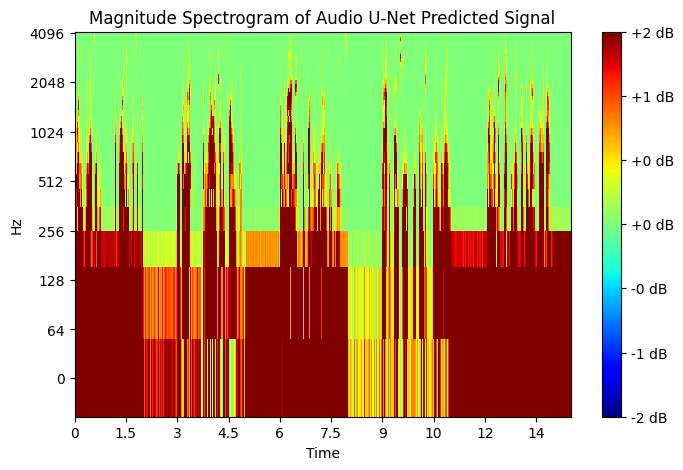

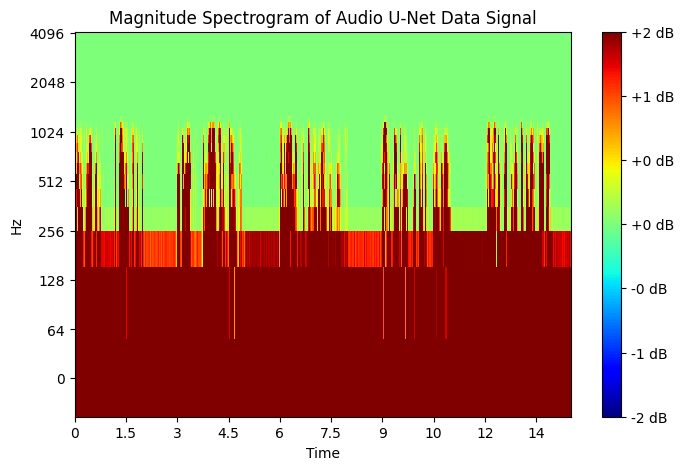

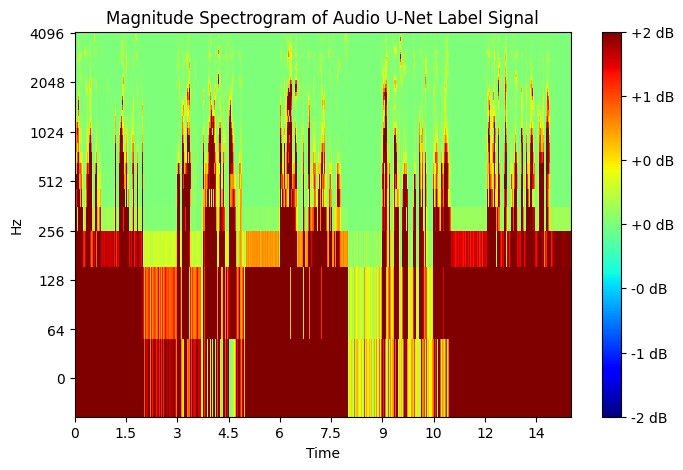

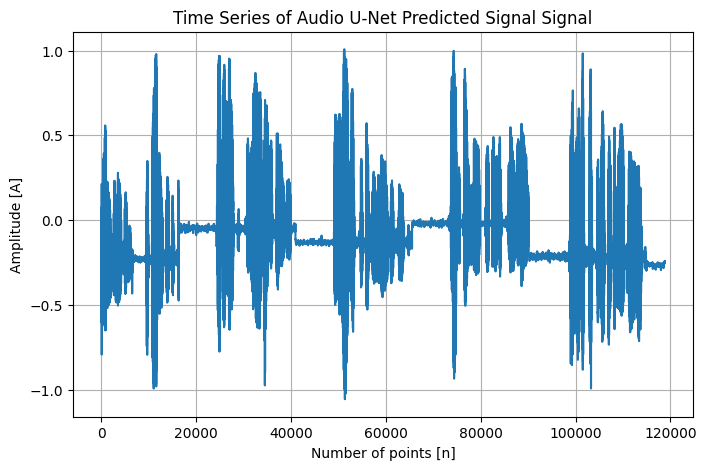

In [12]:
audio = np.squeeze(sample_test).flatten()

us.show_spectrogram(audio, 8192, 80, 40, 'Audio U-Net Predicted')
us.show_spectrogram(np.squeeze(sample_data).flatten(), 8192, 80, 40, 'Audio U-Net Data')
us.show_spectrogram(np.squeeze(sample_label).flatten(), 8192, 80, 40, 'Audio U-Net Label')
us.show_signal(audio, 'Audio U-Net Predicted Signal')
uf.play_sound(audio.flatten(), 8192)

The code bellow saves the audio results.

<span style="color:red"> Provide the data, label, and prediction data paths bellow: </span>

In [14]:
save_data_path = 'data3.wav'
save_label_path = 'label3.wav'
save_prediction_path = 'prediction3.wav'

In [13]:
import soundfile as sf

sf.write(save_data_path, np.squeeze(sample_data).flatten(), 8192)
sf.write(save_label_path, np.squeeze(sample_label).flatten(), 8192)
sf.write(save_prediction_path, audio.flatten(), 8192)